[Jupyter Book](https://geo-smart.github.io/oceanography/intro.html) and [GitHub repo](https://github.com/geo-smart/oceanography).


# Data


## Data types


There are two central data type concepts in this work:


- Platform metadata: When a profiler is ascending / descending / at rest?
- Sensor data: What is the temperature as a function of depth for a given profile?


### Profile metadata


Profiles are not acquired instantaneously. One profile takes on the order of an hour
as the Science Pod rises with positive buoyancy about 180 meters to near the surface
and then is winched back down to the shallow profiler platform. 
Typically nine profiles run per day. As a baseline we can view each profile 
as an *observation* of the state of the epipelagic water column.
Correspondingly, charts of sensor data do not feature a time axis. Rather the vertical 
axis is depth with the surface at the top. The horizontal axis is then the sensor 
parameter: Temperature, salinity, dissolved oxygen, fluorescence etcetera.


Isolating sensor data from a particular profile is a necessary task. This is done
in terms of time boundaries, typically start of ascent to end of ascent. This information
in stored as profile timestamp metadata. (Sensor data includes timestamps and depth but
no information on the state of the science pod.) 
A single profiles is viewed as three consecutive stages: Rest, Ascent, and Descent.
The Rest stage consists of the Science Pod parked at the platform at a depth of 200 meters. 


Profile stage metadata describing the timestamps is stored in a CSV file in this
repository. That information is read in to memory as a pandas DataFrame for reference 
in time-boxing profiles.


### Sensor data


There are about 31 million seconds in a year; and the sampling rate for many
shallow profilers is about one sample per second. As a result some data volume
management is necessary. We can, for example, work with smaller blocks of time, 
typically somewhere between one day and one month.


### Summary of data management considerations


- Profile metadata is relatively small volume, resides within this Book/Repository
- Sensor data volume can be understood in terms of measurements
    - One measurement per second is typical
    - 31 million seconds per year
    - Each sensor measurement is { sensed value, pressure/depth, timestamp }
        - Sensor data also includes some quality control; typically ignored (dropped) here
    - There are about 22 sensor values
        - Most measurements are made on *ascent*, some on *descent* as noted
        - Three of these are from a fluorometer instrument
        - Two of these are nitrate measurements
        - Seven of these are spectral irradiance channels
        - Not included: Spectrophotometer data
    - Water density is a measurement derived from temperature, pressure and salinity
    - Data goes back as far as 2015
        - There are gaps in the data owing to maintenance etcetera
    - There are three shallow profiler sites
        - Coastal Endurance "Oregon Offshore" in 500m depth, distal edge of the continental shelf
        - RCA "Oregon Slope Base" at 3000m depth, bottom of the continental shelf break
        - RCA "Axial Base" at 2100m depth, further out in the Pacific at the base of Axial Seamount
- Moderate-size datasets can be stored in this repository
- Large datasets can be saved external to the repository
    - GitHub recommends a maximum file size of 50MB
- We can take advantage of virtual or *lazy* loading of data structures
    - The data are not literally read into memory from local storage
    - Rather a description of the data is read into memory from remote or external storage
        - This allows for virtual data reduction before actual data is read
        - There are two means of reducing data volume
            - Strip away excess data that is not of immediate interest
            - sub-sample profile data at different vertical resolutions

### Repository folder structure


```
~/book/_toc.yml               -- table of contents --
       img/                   -- contains resource images --
       chapters/              -- Jupyter notebooks map to book chapters --
                data/               -- repo data storage space --
                     modis/              -- Data from the MODIS satellite system
                     argo/               -- Data from the ARGO drifter program
                     roms/               -- Data from the Regional Ocean Modeling System (ROMS)
                     rca/                -- Data from the regional cabled array--
                         profiles/       -- Profile metadata folder--
                                  axb/         -- Site subdirectories --
                                  oos/
                                  osb/
                                      2019.csv     -- Profile metadata for 2019 at the OSB site --
                         sensors/        -- Sensor (measurement) data from shallow profilers / platforms
                                 axb/            -- Axial Base site
                                 oos/            -- Oregon Offshore site
                                 osb/            -- Oregons Slope Base site
                                     ctd_jan22_temperature.nc       -- instrument = CTD, jan22 = time range, sensor = temperature
```


### Data systems 


Shallow profiler data was originally pulled from the [OOI Data Explorer](https://dataexplorer.oceanobservatories.org/).
This practice is now deprecated in favor of the [Interactive Oceans **Data Portal**](https://interactiveoceans.washington.edu).
The latter system includes shallow profiler data held on cloud object storage. The access pattern is described below.
The **Interactive Oceans** website has built-in data exploration and is very educator-friendly. 

### Terminology


* Regional Cabled Array (RCA): A cabled observatory on the sea floor and in select locations rising up through the water column: off the coast of Oregon
* Site: A location in the RCA
* Platform: A mechanical structure -- static or mobile -- at a site
* Instrument: A device fastened to a platform that carries one or more sensors
* Sensor: A device that measures some aspect of the ocean like pH or temperature
* Stream: Data produced by a sensor as part of an instrument located on a platform at a site in the RCA
* Profiler 'Oregon Slope Base'
* Profiler 'Axial Base' PN3A 
* Profiler 'Oregon Offshore' (shared with the OSU Endurance array)

#### Sensor dictionary with abbreviations


The following table lists sensors in relation to instruments. 
Short abbreviations are included. They are sometimes used in the code to 
make it easier to read. 
Spectral irradiance is abbreviated `spkir` in OOI nomenclature. This 
data is broken out by wavelength channel (7 total) into separate sensors.
The `spec` instrument is a spectrophotometer with 83 channels. This 
is treated separate from the main collection of shallow profiler sensors. 
The `current` instrument is a platform-mounted current sensor providing
three-dimensional estimates of current with depth.


```
Short     Sensor                Name used     Instrument     Sensor operates
Abbrev.                         here          folder name
-----     ------                -------       ----------     -----------
A         Chlorophyll-A         chlora        fluor          continuous
B         backscatter           backscatter   fluor          continuous
C         CDOM                  cdom          fluor          continuous
D         Density               density       ctd            continuous
E[]       Spec'r optical abs    oa            spec           ? (83 channels)
F[]       Spec'r beam atten     ba            spec
G         pCO2                  pco2          pco2           midnight/noon descent
H         pH                    ph            ph             midnight/noon descent
I         Spectral Irradiance   spkir412nm    spkir          ?
                                spkir443nm
                                spkir490nm
                                spkir510nm
                                spkir555nm
                                spkir620nm
                                spkir683nm
K         Conductivity          conductivity  ctd            continuous
N         Nitrate               nitrate       nitrate        midnight/noon ascent
P         PAR                   par           par            continuous
Q         pressure              pressure      ctd            continuous
O         dissolved oxygen      do            do             continuous
S         salinity              salinity      ctd            continuous
T         temperature           temp          ctd            continuous
U         velocity east         veast         current        continuous:
V         velocity north        vnorth                           from platform
W         velocity up           vup                              looking up
```

#### Code note


This notebook refers to functions in modules `data.py` and `shallowprofiler.py`.

***Tasks***


- This section does not demonstrate profile use; but it should
- This section effectively does the profile-from-data chart twice; once is enough
- Mothball the ReformatDataFile() function in `data.py` which is part of the old Data Explorer procedure.
- Move ProfilerDepthChart() to a module file
- Deal with the code artifact below on WriteProfile()


```
# def WriteProfile(date_id):
#     fnm = '../data/osb_ctd_' + date_id + '_pressure.nc'                       
#     a0, a1, d0, d1, r0, r1 = ProfileGenerator(fnm, 'z', True)
    # last 2 days chart check: xr.open_dataset(fnm)['z'][-1440*2:-1].plot()
#     if not ProfileWriter('../profiles/osb_profiles_' + date_id + '.csv', a0, a1, d0, d1, r0, r1): print('ProfileWriter() is False')
#    
# for date_id in ['apr21', 'jul21', 'jan22']: WriteProfile(date_id)               # !!!!! hard coded flag
```

## Profiles


This section describes loading profile metadata: Pre-generated and stored in this 
repository at relative path `./data/rca/profiles/<site-abbrev>`. 


- Time is UTM/Zulu.
- Typically nine profiles run per day, two of which are noticeably longer in duration
- The two longer profiles are at midnight and noon local time
    - They are associated with nitrate, pCO2 and pH measurement
    - These have built-in pauses on descent for equilibration
- During *rest* intervals the profiler is secured to the platform at 200m depth
    - The platform has its own set of instruments


Jupyter Notebook running Python 3

Jupyter Notebook running Python 3


True

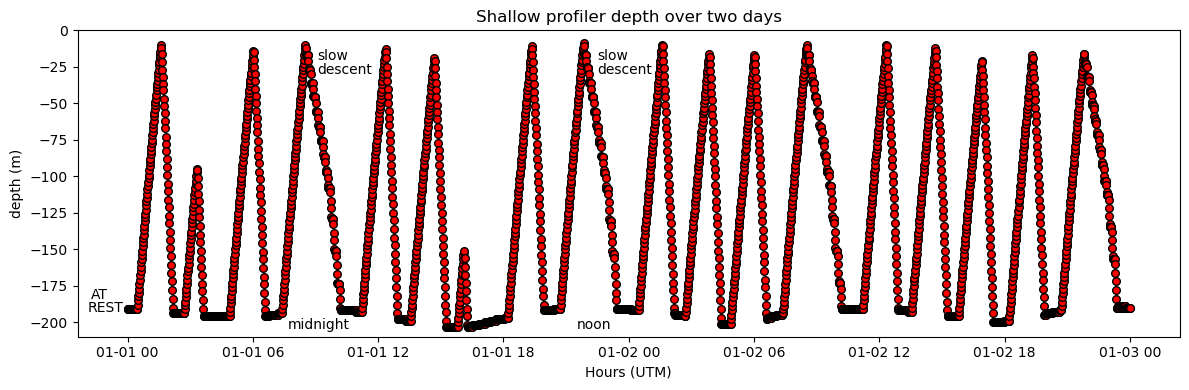

In [2]:
from matplotlib import pyplot as plt
from shallowprofiler import sensors
from data import *

print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))


def ProfilerDepthChart(t0, t1, fnm):
    ds = xr.open_dataset(fnm).sel(time=slice(dt64(t0), dt64(t1)))
    fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
    axs.plot(ds.time, ds.z, marker='.', ms=11., color='k', mfc='r', linewidth='.0001')
    axs.set(ylim = (-210., 0.), title='Shallow profiler depth over two days', ylabel='depth (m)', xlabel='Hours (UTM)')
    axs.text(dt64('2021-12-31 22:15'), -184, 'AT')
    axs.text(dt64('2021-12-31 22:05'), -193, 'REST')
    axs.text(dt64('2022-01-01 07:40'), -205, 'midnight')
    axs.text(dt64('2022-01-01 21:30'), -205, 'noon')
    axs.text(dt64('2022-01-01 09:05'), -20, 'slow')
    axs.text(dt64('2022-01-01 09:05'), -30, 'descent')
    axs.text(dt64('2022-01-01 22:30'), -20, 'slow')
    axs.text(dt64('2022-01-01 22:30'), -30, 'descent')
    return True
    

ProfilerDepthChart('2022-01-01', '2022-01-03', './data/rca/sensors/osb/ctd_jan22_conductivity.nc')  # index [0] is arbitrary; any dataset will include z data

#### How to use profile files

- Read the file into a pandas Dataframe
- Each row is a Rest --- Ascent --- Descent phase sequence
    - Each phase has a start and an end: For a total of six events
        - There is degeneracy: r1 == a0, a1 == d0, and mostly d1 == the next row's r0
    - Each entry for these six events is a triple (i, t, z)
        - i is an index from the source file; usually ignore this
        - t is the time of the event; important
        - z is the depth of the event
            - for a1/d0 this will indicate if the profile approached the surface
    - Consequently each row has 18 columns
    
Suppose the idea is to make a depth plot of temperature for a particular profile. Select out this
profile and slice the source data using a time range given as a0 to a1. See the next notebook 
for examples.


...January 2022 Oregon Slope Base daily profiles...


True

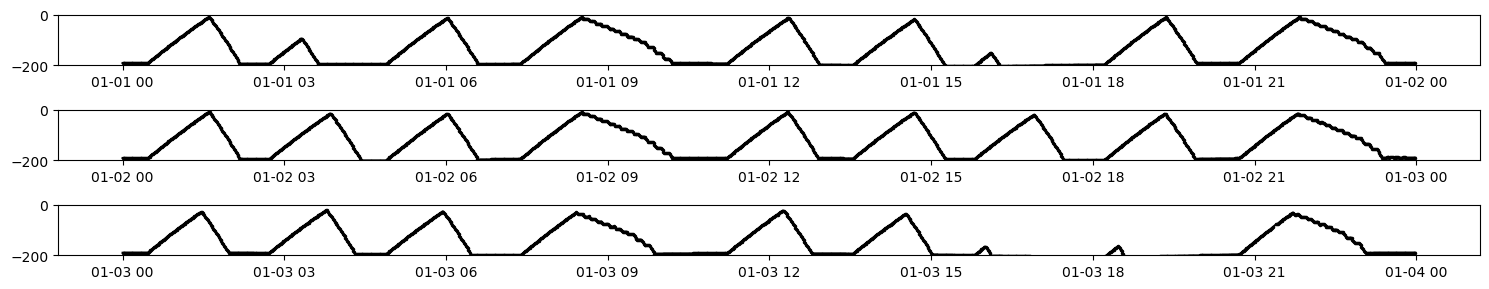

In [3]:
#### visual on one month of profiles
# !!!!! hard coded flag
# !!!!! flag move to charts

def VisualizeProfiles(date_id, n_days, year_id, month_id, month_name, site_name):
    ds = xr.open_dataset('./data/rca/sensors/osb/ctd_jan22_conductivity.nc')
    fig, axs = plt.subplots(n_days, 1, figsize=(15,n_days), tight_layout=True)

    for i in range(n_days):
        daystring = str(i+1) if i > 8 else '0' + str(i+1)
        time0 = dt64(year_id + '-' + month_id + '-' + daystring + 'T00:00:00')
        time1 = dt64(year_id + '-' + month_id + '-' + daystring + 'T23:59:59')
        dsDay = ds.sel(time=slice(time0, time1))
        axs[i].plot(dsDay.time, dsDay.z, marker='.', markersize=3., color='k')
        axs[i].set(ylim = (-200., 0.))

    print('...' + month_name + ' ' + str(year_id) + ' ' + site_name + ' daily profiles...')
    return True


VisualizeProfiles('jan22', 3, '2022', '01', 'January', 'Oregon Slope Base')


#### Comment on profile phase durations


```
  Ascents:   67.4 +-3.0  minutes
  Descents:  vary depending: midnight/noon descents are slow (70 minutes); otherwise quick (20 minutes)
  Rests:     vary with descent, 30 / 60 minutes
```


## Sensor Data


This section connects to existing sensor datasets, data found within the repository corresponding to
the Oregon Slope Base ('osb') site during January 2022. 



In [4]:

base_path = './data/rca/sensors/'
date_id   = 'jan22'
site_id   = 'osb'

data_file_list = []
for s in sensors:
    data_file_list.append(base_path + site_id + '/' + s[1] + '_' + date_id + '_' + s[0] + '.nc')   # example result: 'osb/ctd_jan22_temperature.nc'

!ls -al ./data/rca/sensors/osb/ctd_jan22_conductivity.nc

# relative path to data files is base_path + site_id + '/'
# The data variables corresponding to the jan22_data filenames in data_file_list[]:
month_data_vars = [
    ['pressure'],['temperature'],['density'], ['salinity'], ['conductivity'],
    ['fdom'], ['chlora'], ['bb'],
    ['spkir412nm', 'spkir443nm', 'spkir490nm', 'spkir510nm', 'spkir555nm', 'spkir620nm', 'spkir683nm'],
    ['nitrate'],
    ['pco2'],
    ['do'],
    ['par'],
    ['ph'],
    ['up'], ['east'], ['north']
    ]

-rw-r--r-- 1 rob rob 894104 Jun 16 17:20 ./data/rca/sensors/osb/ctd_jan22_conductivity.nc


### Dataset check


The above cell creates `data_file_list`: A list of time-bounded NetCDF sensor measurement files (in-repo). 
To review these files in more detail:
    

```
ds = xr.open_dataset(data_file_list[0])
print(ds)
```

In [5]:
# this cell connects to the RCA Zarr filesystem on the cloud and lists available data streams

import netCDF4
import xarray as xr
import s3fs

fs = s3fs.S3FileSystem(anon=True)

streamlist = fs.listdir('ooi-data', detail = False)

def InstrumentBreakout(s):
    print('Field breakout:', s[9:11], s[11:13], s[13:15], s[15:17], s[18:20], s[20:22], s[22:23], s[24:26], \
          s[27:32], s[32:33], s[33:36], s[46:])

print('List Oregon Slope Base Profiler streams:\n')
for s in streamlist:
    if 'SF01A' in s: print(s)
print()
print('Translation:')
print('  CTDPF / ctdpf                 CTD')
print('  PHSEN / phsen                 pH')
print('  FLORT / flort                 Fluorometer { FDOM, Chlor-A, Backscatter }')
print('  OPTAA / optaa                 Spectrophotometer') 
print('  PARAD / parad                 PAR')
print('  SPKIR / spkir                 Spectral Irradiance')
print('  NUTNR / nutnr_a_dark_sample   Nitrate: Dark sample (explain please)')
print('  NUTNR / nutnr_a_sample        Nitrate: ...')
print('  VELPT / velpt                 Velocity (current) ambiguous: on SCIP or affixed to platform?')
print('  PCO2W / pco2w                 pCO2')
print()

stream_choice = 15       # the 15th element in the file list corresponds to the Shallow Profiler, Oregon Slope Base site

print()
print('Full stream name:', streamlist[stream_choice])
print()
InstrumentBreakout(streamlist[stream_choice])
print()
print('The first field has CE for Coastal Endurance or RS for Regional Cabled Array.')
print('Fields 5, 6 and 7 give us shallow profiler site and choice of profiler or platform.')
print()
indenter = 4
print(' '*indenter + 'PC 01 B --> Oregon Offshore 200m Platform')
print(' '*indenter + 'SF 01 B --> Oregon Offshore Profiler')
print(' '*indenter + 'PC 01 A --> Oregon Slope Base Profiler')
print(' '*indenter + 'SF 01 A --> Oregon Slope Base Profiler')
print(' '*indenter + 'PC 03 A --> Axial Base 200m Platform')
print(' '*indenter + 'SF 03 A --> Axial Base Profiler')
print()
print('Non-shallow-profiler examples:')
print('  DP O3 A is the Axial Base Deep Profiler')
print('  LJ 01 A is the Oregon Slope Base Seafloor')
print()

List Oregon Slope Base Profiler streams:

ooi-data/RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample
ooi-data/RS01SBPS-SF01A-2D-PHSENA101-streamed-phsen_data_record
ooi-data/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record
ooi-data/RS01SBPS-SF01A-3B-OPTAAD101-streamed-optaa_sample
ooi-data/RS01SBPS-SF01A-3C-PARADA101-streamed-parad_sa_sample
ooi-data/RS01SBPS-SF01A-3D-SPKIRA101-streamed-spkir_data_record
ooi-data/RS01SBPS-SF01A-4A-NUTNRA101-streamed-nutnr_a_dark_sample
ooi-data/RS01SBPS-SF01A-4A-NUTNRA101-streamed-nutnr_a_sample
ooi-data/RS01SBPS-SF01A-4B-VELPTD102-streamed-velpt_velocity_data
ooi-data/RS01SBPS-SF01A-4F-PCO2WA101-streamed-pco2w_a_sami_data_record

Translation:
  CTDPF / ctdpf                 CTD
  PHSEN / phsen                 pH
  FLORT / flort                 Fluorometer { FDOM, Chlor-A, Backscatter }
  OPTAA / optaa                 Spectrophotometer
  PARAD / parad                 PAR
  SPKIR / spkir                 Spectral Irradiance
  NUTNR / nutnr_

In [6]:
osb_profiler_streams = [sname for sname in streamlist if 'SF01A' in sname]
for s in osb_profiler_streams: 
    if 'ctdpf' in s: osb_sp_ctd = s

print('OSB CTD stream:', osb_sp_ctd)
print()

def loadData(stream_name):
    fs = s3fs.S3FileSystem(anon=True)
    zarr_store = fs.get_mapper(stream_name)
    ds = xr.open_zarr(zarr_store, consolidated=True)
    return ds

siteData = loadData(osb_sp_ctd)
# siteData
print('site data is now lazy-loaded')

print(siteData.time[-1])

from shallowprofiler import *
from charts import *

profiles = ReadProfileMetadata()    # this is an error: Hardcoded for Jan 2022
how_many_charts = 3
profile_list = [n for n in range(how_many_charts)]   # quick check: use d['temperature'].z.plot()

OSB CTD stream: ooi-data/RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample

site data is now lazy-loaded
<xarray.DataArray 'time' ()>
array('2024-07-06T11:12:59.607388672', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2024-07-06T11:12:59.607388672
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time


In [7]:
# This cell assembles a data dictionary "d" from the old-style datasets (that live within the repo)

d = {}

relative_path = 'rca/sensors/data/'
sitestring = 'osb'                    # available: osb = Oregon Slope Base
monthstring = 'jan22'                 # available: apr21, jul21, jan22

# error: apr21 and jul21 seem to fail on pCO2 despite data files present

def AssembleDataFilename(relative_path, site, instrument, time, sensor): 
    return relative_path + site + '_' + instrument + '_' + time + '_' + sensor + '.nc'

def GetSensorTuple(s, f):
    '''
    s is the sensor identifier string like 'temperature'
    f is the source filename like './../data/osb_ctd_jan22_temperature.nc' 
    '''
    df_sensor    = xr.open_dataset(f)[s]
    df_z         = xr.open_dataset(f)['z']
    range_lo     = ranges[s][0]
    range_hi     = ranges[s][1]
    sensor_color = colors[s]
    return (df_sensor, df_z, range_lo, range_hi, sensor_color)


for sensor in sensors:          # sensor is a list of 2 strings [sensor_str, instrument_str]
    f = AssembleDataFilename(relative_path, sitestring, sensor[1], monthstring, sensor[0])
    d[sensor[0]] = GetSensorTuple(sensor[0], f)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/rob/oceanography/book/chapters/rca/sensors/data/osb_ctd_jan22_conductivity.nc'

In [ ]:
# temperature and salinity
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['salinity']], profile_list, 
                          d['temperature'][0], d['temperature'][1], 'Temperature', colors['temperature'],    'ascent',
                          d['salinity'][0],       d['salinity'][1],    'Salinity',  colors['salinity'], 'ascent', 6, 4)

In [ ]:
ChartSensor(profiles, [7., 11.], [0, 1, 2], ds.sea_water_temperature, -ds.sea_water_pressure, 'temperature', 'red', 'ascent', 8, 6)

In [ ]:
ChartSensor(profiles, [7., 11.], [0, 1, 2], ds.sea_water_temperature, -ds.sea_water_pressure, 'temperature', 'red', 'descent', 8, 6)

In [ ]:
# temperature: ascent versus descent
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['temperature']], [0, 1, 2], 
                          d['temperature'][0], d['temperature'][1], 'T-Ascent',   colors['temperature'],    'ascent',
                          d['temperature'][0], d['temperature'][1], 'T-Descent',  'green',                  'descent', 6, 4)

In [ ]:
t0, t1 = '2022-01-01T00', '2022-12-31T23'
ds = siteData.sel(time=slice(t0, t1))
ds.time[0], ds.time[-1]

In [ ]:
def SPDataReduce(ds, t0, t1, keepers, rename):
    """
    From a zarr Dataset for a shallow profiler stream ('ds') write a NetCDF file with just 
    time/sensor-value/depth over a time period typically no longer than a month.
      - check that the dimension and coordinate is 'time'
      - drop or rename data vars
      - drop attributes
    """
    
    if not len(ds.dims) == 1: 
        return False, "Dataset dims count is not 1 (as assumed)"
    if not list(dict(ds.dims))[0] == 'time': 
        return False, "Dataset dim is not 'time' (as assumed)"
    if not len(ds.coords) == 1: 
        return False, "Dataset coords count is not 1 (as assumed)"
    if not list(dict(ds.coords))[0] == 'time': 
        return False, "Dataset coord is not 'time' (as assumed)"
    
    ds = ds.sel(time=slice(t0, t1))
    
    for s in ds.data_vars:
        if not s in keepers: ds = ds.drop(s)                              # drop extraneous data vars
    for s in ds.data_vars: ds = ds.rename({s:rename[keepers.index(s)]})   # rename the others
    a = [s for s in ds.attrs]
    for p in a: ds.attrs.pop(p)
    return ds, 'looks ok'

t0, t1 = '2022-01-01T00', '2022-01-31T23'

ds_reduced, reply = SPDataReduce(ds, t0, t1, ['sea_water_temperature', 'sea_water_pressure'], 
                                 ['temperature', 'depth'], )
print(reply)
print(ds_reduced)

In [ ]:
ds_reduced.to_netcdf('osb_temp_jan_2022.nc') 

In [ ]:
# temperature: ascent versus descent
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['temperature']], [0, 1, 2], 
                          ds_reduced.temperature, -ds_reduced.depth,
                          'T-Ascent',   colors['temperature'],    'ascent',
                          ds_reduced.temperature, -ds_reduced.depth,
                          'T-Descent',  'green',                  'descent', 6, 4)

In [ ]:
# temperature: ascent versus descent
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['temperature']], [0, 1, 2], 
                          ds_reduced.temperature, -ds_reduced.depth,
                          'Zarr Data',   colors['temperature'],    'ascent',
                          d['temperature'][0], d['temperature'][1], 'OOI Data',   'blue',    'ascent', 6, 4)

```
df   = ds.to_dataframe()
vals = [xr.DataArray(data=df[c], dims=['time'], coords={'time':df.index}, attrs=ds[c].attrs) for c in df.columns]
ds   = xr.Dataset(dict(zip(df.columns, vals)), attrs=ds.attrs)
```

In [ ]:
ds_read = xr.open_dataset('./data/osb_temp_jan_2022.nc')

# temperature: ascent versus descent
fig,axs = ChartTwoSensors(profiles, [ranges['temperature'], ranges['temperature']], [0, 1, 2], 
                          ds_read.temperature, -ds_read.depth,
                          'Zarr Data',   colors['temperature'],    'ascent',
                          d['temperature'][0], d['temperature'][1], 'OOI Data',   'blue',    'ascent', 6, 4)